# Exploratory Data Analysis

### Import Libraries 

In [1]:
import pandas as pd #For data manipulation

import numpy as np #For data computation array,linear alegbra,etc.

import matplotlib.pyplot as plt
##Can use the code: plt.style.use('ggplot') #for better looking graphs\
#similar to ggplot from r

import seaborn as sns #Another lib for better looking graphs 


### Importing the data sets:

In [2]:
#modern data set
modern_df = pd.read_csv('modern_df.csv')

#pre modern data set
pre_mod_df = pd.read_csv('pre_modern_df.csv')


#Modern Players
player_mdf = pd.read_csv('modern_players.csv')


#Pre Modern players
player_pmdf = pd.read_csv('pre_modern_players.csv')

## Player Count Throughout the Years

### 1) Number of Hall of Famers throughout 1980-2020

In [3]:
# Creating a copy of the dataframes
MDF = modern_df.copy()

PMDF = pre_mod_df.copy()

In [4]:
# Creating the HoF columns and getting rid of the '*' after the player's name in the hall of fame
MDF['HoF'] = MDF['Player'].apply(lambda x: 'Yes' if '*' in x else 'No')

PMDF['HoF'] = PMDF['Player'].apply(lambda x: 'Yes' if '*' in x else 'No')


MDF['Player'] = MDF['Player'].apply(lambda x: x.split('*')[0])

PMDF['Player'] = PMDF['Player'].apply(lambda x: x.split('*')[0])

In [5]:
# Creating a new data frame and dropping duplicates players from the same year for both dataframes
hof_year_MDF = MDF.loc[MDF['HoF'] == 'Yes',:].copy()
hof_year_MDF.drop_duplicates(subset=['Player','Year'],inplace=True)


nhof_year_MDF = MDF.loc[MDF['HoF'] == 'No',:].copy()
nhof_year_MDF.drop_duplicates(subset=['Player','Year'],inplace=True)


In [6]:
# Grouping the data by years to get the number of hall of famers for each year
hof_year_MDF = hof_year_MDF.groupby('Year',as_index=False).count()

nhof_year_MDF = nhof_year_MDF.groupby('Year',as_index=False).count()

Text(0.5, 1.0, 'Total Number of Hall of Famer from 1980-2016')

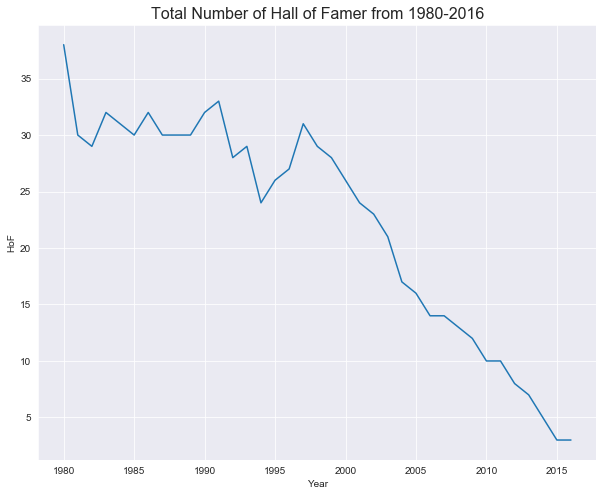

In [7]:
sns.set_style('darkgrid')


fig= plt.figure(figsize=(10,8))
sns.lineplot(data=hof_year_MDF,x='Year',y='HoF').set_title('Total Number of Hall of Famer from 1980-2016',
                                                          fontsize=16)

Text(0, 0.5, 'Non HoF')

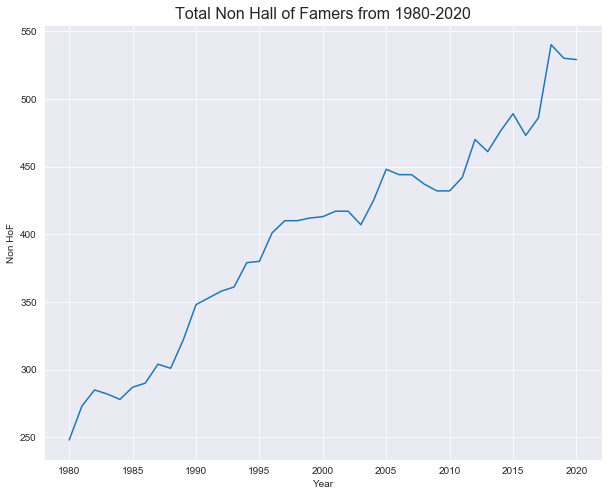

In [8]:
# Creating Plot
fig= plt.figure(figsize=(10,8))
sns.lineplot(data=nhof_year_MDF,x='Year',y='HoF').set_title('Total Non Hall of Famers from 1980-2020',
                                                            fontsize=16 )
plt.ylabel('Non HoF')

#### Total Amount of Players throughout 1980-2020

Text(0, 0.5, 'Total Number of Players')

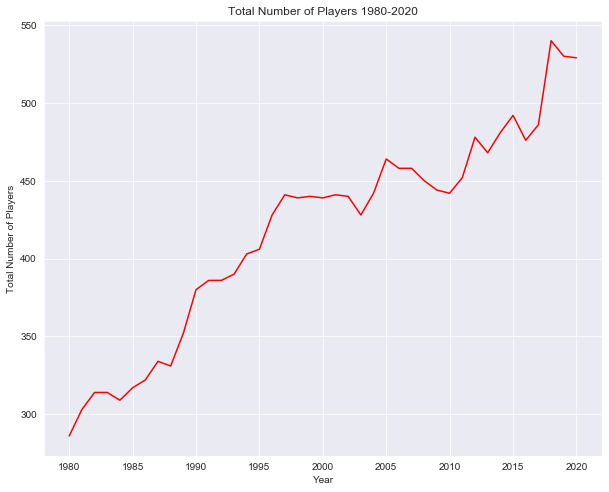

In [9]:
# Creating total count of all players 
total_MDF = MDF.drop_duplicates(subset=['Player','Year'])
total_MDF = total_MDF.groupby('Year',as_index=False).count()

fig= plt.figure(figsize=(10,8))
sns.lineplot(data=total_MDF,x='Year',y='Player',color='red').set_title('Total Number of Players 1980-2020')

plt.ylabel('Total Number of Players')

### Summary

The modern time series plots are most likely due to it being too early for HoF nominations for some of the players and some potential HoF are still playing which makes non HoF a lot more than it would potentially be. There has been a steady increasing total amount of players in the league.

### 2) Number of HoF throughout 1950-1979

In [10]:
#Wrangling to get two separate dataframes based on HoF status and getting rid of duplicates
hof_year_PMDF = PMDF.loc[PMDF['HoF'] == 'Yes',:].copy()
hof_year_PMDF.drop_duplicates(subset=['Player','Year'],inplace=True)

nhof_year_PMDF = PMDF.loc[PMDF['HoF'] == 'No',:].copy()
nhof_year_PMDF.drop_duplicates(subset=['Player','Year'],inplace=True)

# Group each dataframe by Year to get the count
hof_year_PMDF = hof_year_PMDF.groupby('Year',as_index=False).count()
nhof_year_PMDF = nhof_year_PMDF.groupby('Year',as_index=False).count()

Text(0.5, 1.0, 'Total Hall of Famers from 1950-1979')

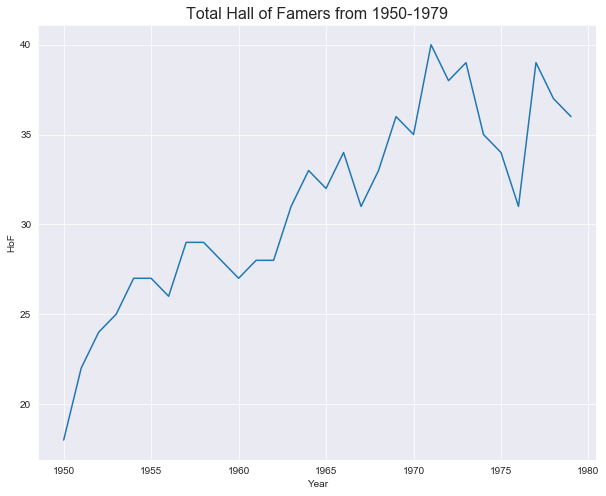

In [11]:
# Create Plot
fig= plt.figure(figsize=(10,8))
sns.lineplot(data=hof_year_PMDF,x='Year',y='HoF').set_title('Total Hall of Famers from 1950-1979',
                                                            fontsize=16)


Text(0, 0.5, 'Non HoF')

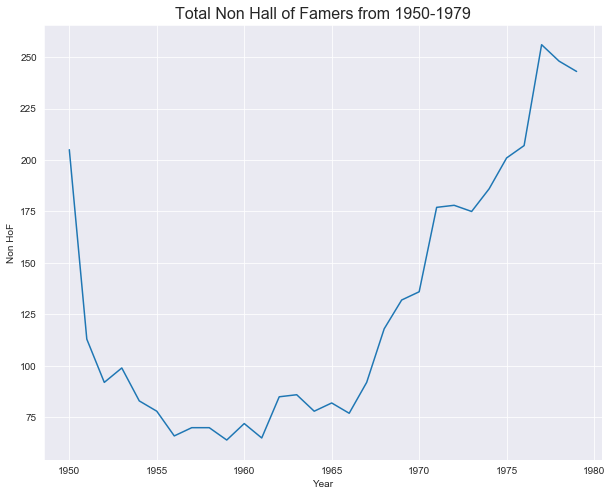

In [12]:
fig= plt.figure(figsize=(10,8))
sns.lineplot(data=nhof_year_PMDF,x='Year',y='HoF').set_title('Total Non Hall of Famers from 1950-1979',
                                                             fontsize=16)

plt.ylabel('Non HoF')

#### Total Number of Players Throughout 1950-1979

Text(0, 0.5, 'Total Number of Players')

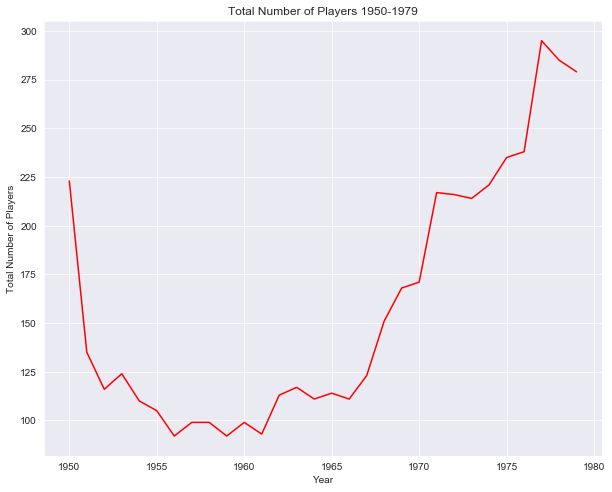

In [13]:
# Creating total count of all players 
PMDF_total = PMDF.drop_duplicates(subset=['Player','Year'])
PMDF_total = PMDF_total.groupby('Year',as_index=False).count()

# Creating Plot
fig= plt.figure(figsize=(10,8))
sns.lineplot(data=PMDF_total,x='Year',y='Player',color='red').set_title('Total Number of Players 1950-1979')

plt.ylabel('Total Number of Players')

### Summary

When looking at the total amount of players from 1950-1979 you can see there was an overall decline in the amount of players from 1952-1966. Then after 1966 there was surge in the amount of players in the league. Also there was a increase in the amount of Hall of Famers playing in the league at the same time when there was decrease amount of players. 1971 was the climax of the amount of Hall of Famers playing in the league and 1977 was the climax for the total amount of all players.

## Number of Hall of Famers by Teams

### 1) Top 10 Teams from 1980-2020

In [14]:
#Getting data of number of HoF per team and grouping by team
hof_tm_mdf = MDF.loc[MDF['HoF'] == 'Yes',:]
hof_tm_mdf = hof_tm_mdf.groupby('Tm',as_index=False).count()
hof_tm_mdf = hof_tm_mdf[['Tm','HoF']]

#Sorting values 
hof_tm_mdf=hof_tm_mdf.sort_values('HoF',ascending=False)

Text(0.5, 0, 'Team')

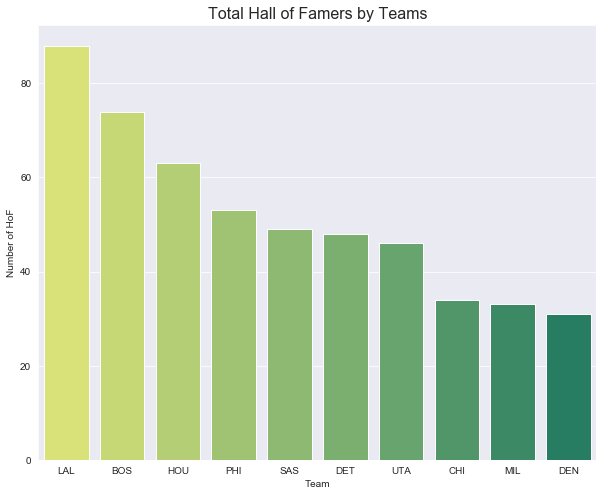

In [15]:
# Creating Plot
fig= plt.figure(figsize=(10,8))
sns.barplot(data=hof_tm_mdf[0:10],x = 'Tm',y='HoF',palette='summer_r').set_title('Total Hall of Famers by Teams',
                                                                                fontsize=16)
plt.ylabel('Number of HoF')
plt.xlabel('Team')

### 2) Top 10 Teams from 1950-1979

In [16]:
#Getting data of number of HoF per team and grouping by team
hof_tm_pmdf = PMDF.loc[PMDF['HoF'] == 'Yes',:]
hof_tm_pmdf = hof_tm_pmdf.groupby('Tm',as_index=False).count()
hof_tm_pmdf = hof_tm_pmdf[['Tm','HoF']]

#Sorting values 
hof_tm_pmdf=hof_tm_pmdf.sort_values('HoF',ascending=False)

Text(0.5, 0, 'Team')

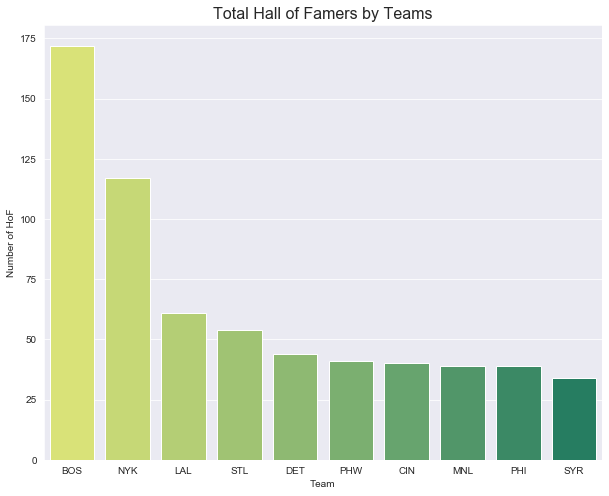

In [17]:
fig= plt.figure(figsize=(10,8))
sns.barplot(data=hof_tm_pmdf[0:10],x = 'Tm',y='HoF',palette='summer_r').set_title('Total Hall of Famers by Teams',
                                                                                fontsize=16)
plt.ylabel('Number of HoF')
plt.xlabel('Team')

### Summary

While looking at the graphs above there is some teams that stand out for example the Boston Celtics and Los Angeles Lakers. These two teams are in the top 3 for the most hall of famers throughout the years. For the modern era the amount of hall of fame players between teams isn't a lot when compare to the pre modern era.

## Getting the Average stats for Hall of Famers and non Hall of Famers

Selected players that had played at least 100 games and played 10 minutes (1000 minutes). Used this to prevent players who haven't play many minutes or games from skewing the averages.

### **1) Modern Era**

In [18]:
hf_mdf=player_mdf[(player_mdf['G'] >= 100) & (player_mdf['MP'] >= 10)]

In [19]:
print(hf_mdf.shape)
hf_mdf.describe()

(1822, 27)


,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,...,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000
mean,530.035126,254.879254,21.646839,3.379824,7.374259,0.456114,0.464967,1.339270,0.255401,2.914874,...,0.738551,1.100483,2.668337,3.768551,2.006685,0.717300,0.439303,1.338167,2.088255,8.863705
std,329.877312,282.057771,6.743174,1.715036,3.565241,0.046830,0.553726,1.491823,0.131706,1.631130,...,0.087396,0.727028,1.457074,2.084920,1.575494,0.365243,0.438446,0.634895,0.607311,4.590641
min,100.000000,0.000000,10.020000,0.570000,1.440000,0.310000,0.000000,0.000000,0.000000,0.290000,...,0.380000,0.050000,0.430000,0.630000,0.180000,0.120000,0.010000,0.170000,0.530000,1.480000
25%,241.000000,42.000000,16.220000,2.070000,4.710000,0.420000,0.010000,0.080000,0.170000,1.690000,...,0.690000,0.522500,1.620000,2.220000,0.890000,0.450000,0.150000,0.870000,1.650000,5.422500
50%,473.000000,137.000000,20.990000,2.955000,6.580000,0.450000,0.220000,0.710000,0.300000,2.485000,...,0.750000,0.940000,2.310000,3.240000,1.500000,0.660000,0.290000,1.190000,2.060000,7.745000
75%,761.750000,393.500000,26.727500,4.330000,9.390000,0.480000,0.797500,2.260000,0.350000,3.817500,...,0.800000,1.537500,3.320000,4.787500,2.717500,0.900000,0.570000,1.710000,2.490000,11.287500
max,1921.000000,1475.000000,40.700000,11.370000,22.890000,0.720000,3.570000,8.210000,1.000000,10.830000,...,0.930000,4.820000,9.210000,13.950000,11.190000,2.820000,3.500000,4.230000,4.230000,30.120000


In [20]:
hof_mdf = hf_mdf.groupby(by='HoF',as_index=False ).mean().round(2)
hof_mdf

,HoF,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,No,517.80,238.06,21.24,3.25,7.14,0.45,0.47,1.35,0.26,...,0.74,1.07,2.59,3.66,1.94,0.70,0.42,1.30,2.07,8.53
1,Yes,840.93,682.25,32.01,6.60,13.33,0.50,0.35,1.02,0.24,...,0.77,1.91,4.62,6.53,3.66,1.14,0.92,2.43,2.68,17.38


### **2) Pre Modern Era**

In [21]:
hf_pmdf=player_pmdf[(player_pmdf['G'] >= 100) & (player_pmdf['MP'] >= 10)]

In [22]:
print(hf_pmdf.shape)
hf_pmdf.describe()

(645, 17)


,G,MP,FG,FGA,FG%,2P,2PA,2P%,FT,FTA,FT%,TRB,AST,PF,PTS
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,428.165891,22.852930,3.941132,9.048651,0.429783,3.941132,9.048651,0.429783,2.206574,3.000031,0.726109,4.908000,2.217225,2.571829,10.088899
std,260.375962,7.290531,1.963706,4.007896,0.049538,1.963706,4.007896,0.049538,1.288557,1.655701,0.076405,2.985326,1.376449,0.670965,5.018969
min,100.000000,10.010000,0.830000,2.110000,0.300000,0.830000,2.110000,0.300000,0.210000,0.380000,0.320000,0.880000,0.340000,0.940000,2.150000
25%,218.000000,17.240000,2.490000,6.060000,0.400000,2.490000,6.060000,0.400000,1.260000,1.800000,0.680000,2.820000,1.170000,2.070000,6.530000
50%,357.000000,22.300000,3.480000,8.150000,0.430000,3.480000,8.150000,0.430000,1.890000,2.660000,0.730000,4.140000,1.930000,2.580000,8.740000
75%,613.000000,27.550000,4.830000,11.040000,0.460000,4.830000,11.040000,0.460000,2.830000,3.780000,0.780000,6.330000,2.940000,3.030000,12.490000
max,1290.000000,45.760000,12.290000,23.840000,0.580000,12.290000,23.840000,0.580000,7.810000,11.400000,0.900000,22.900000,9.510000,4.230000,30.370000


In [23]:
hof_pmdf = hf_pmdf.groupby(by='HoF',as_index=False ).mean().round(2)
hof_pmdf

,HoF,G,MP,FG,FGA,FG%,2P,2PA,2P%,FT,FTA,FT%,TRB,AST,PF,PTS
0,No,386.52,21.29,3.49,8.09,0.43,3.49,8.09,0.43,1.88,2.58,0.72,4.36,2.00,2.48,8.86
1,Yes,647.31,31.10,6.32,14.07,0.44,6.32,14.07,0.44,3.93,5.23,0.75,7.81,3.37,3.05,16.58


## Total Amount of Hall of Famers

One thing to note with the count plots is that there is a lot more Hall of Famers in the Pre Modern Era compare to the Modern Era. This is mostly likely due to more time has pass compare to the modern era so in turn there would be more players eligible in that era.

#### Pre Modern Era

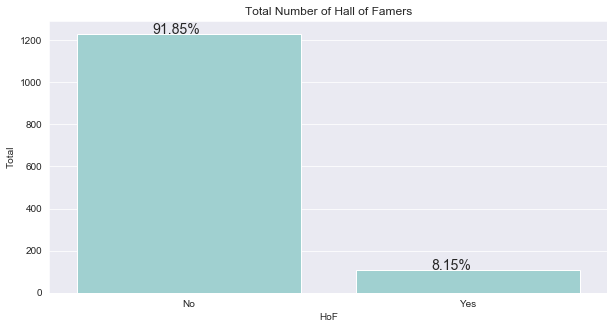

In [24]:
plt.figure(figsize=(10,5))

ax = sns.countplot(data=player_pmdf, x="HoF",color='#98D8D8')
ax.set_title('Total Number of Hall of Famers')
plt.ylabel('Total')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    total = len(player_pmdf['HoF'])
    percentage = '{:.2f}%'.format(100 * (height / total))
    ax.annotate(percentage, (x + width / 2.5 - 0.05 , y + height) ,size=14)

#### Modern Era

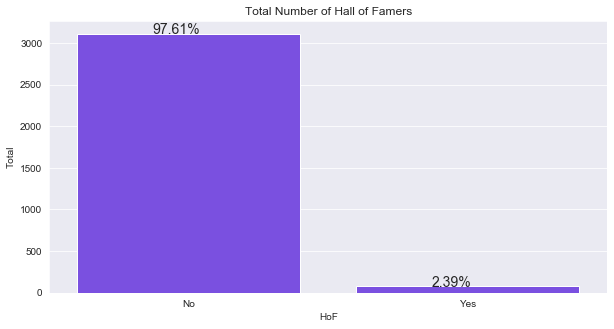

In [25]:
plt.figure(figsize=(10,5))
ax1=sns.countplot(data=player_mdf,x='HoF',color='#7038F8')
ax1.set_title('Total Number of Hall of Famers')
plt.ylabel('Total')

for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    total = len(player_mdf['HoF'])
    percentage = '{:.2f}%'.format(100 * (height / total))
    ax1.annotate(percentage, (x + width / 2.5 - 0.05 , y + height) ,size=14)

## Histogram (PTS, TRB, AST)

#### Modern Era

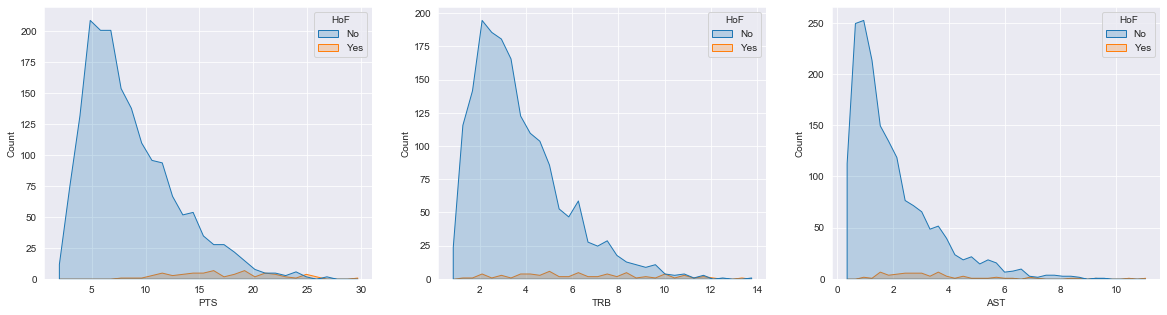

In [26]:
box = ['PTS','TRB','AST']
plt.figure(figsize=(20,5))
sub = 1
for stats in box:
    plt.subplot(1,3,sub)
    sns.histplot(data=hf_mdf, x= stats,hue='HoF',element='poly')
    sub = sub + 1
    

#### Pre Modern Era

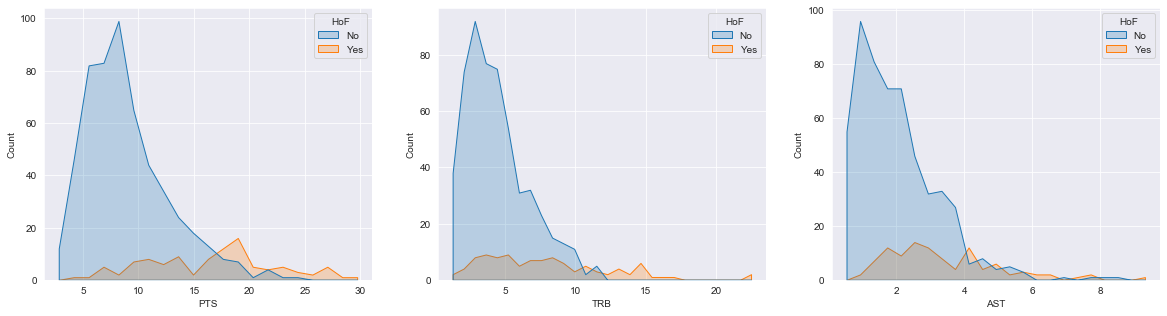

In [27]:
plt.figure(figsize=(20,5))
sub = 1
for stats in box:
    plt.subplot(1,3,sub)
    sns.histplot(data=hf_pmdf, x= stats,hue='HoF',element='poly')
    sub = sub + 1


### Summary

When looking at the histograms it's clear that in 3 of the major stats the players that are non hall of famers are in the lower end of the stats.